In [61]:
class DecisionTree:
    def __init__(self):
        self.tree_dict = dict()
        
    def fit(self, X, y):
        self.tree_dict = self.grow_tree(X, y)
        
    def grow_tree(self, X, y):
        if len(np.unique(y))==1:
            return y[0]
        if len(np.unique(X))==1:
            return np.unique(y)[np.unique(y,return_counts=True)[1].argmax()]
        
        best_criterion = 1.1
        curr_dict = dict()
        for feature in range(X.shape[1]):
            values = np.unique(X[:, feature])
            values = (values[1:] + values[:-1])/2
            for value in values:
                y_true = np.unique(y[X[:, feature]>value], return_counts=True)[1]
                y_false = np.unique(y[X[:, feature]<=value], return_counts=True)[1]
                curr_criterion = self.criterion(y_true, y_false)
                if curr_criterion < best_criterion:
                    best_criterion = curr_criterion
                    curr_dict['feature'] = feature
                    curr_dict['threshold'] = value
        best_feature = curr_dict['feature']
        best_threshold = curr_dict['threshold']
        X_true = X[X[:, best_feature]>best_threshold]
        X_false = X[X[:, best_feature]<=best_threshold]
        y_true = y[X[:, best_feature]>best_threshold]
        y_false = y[X[:, best_feature]<=best_threshold]
        curr_dict['true'] = self.grow_tree(X_true, y_true)
        curr_dict['false'] = self.grow_tree(X_false, y_false)
        return curr_dict
    
    def score(self, X, y):
        return (y==self.predict(X)).mean()
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            y_pred[i] = self.get_pred(x, self.tree_dict)
        return y_pred
            
    def get_pred(self, x, curr_tree):
        if not isinstance(curr_tree, dict):
            return curr_tree
        if x[curr_tree['feature']] > curr_tree['threshold']:
            return self.get_pred(x, curr_tree['true'])
        return self.get_pred(x, curr_tree['false'])
                
    def criterion(self, y1, y2):
        cr1 = 1 - ((y1/y1.sum()) ** 2).sum()
        cr2 = 1 - ((y2/y2.sum()) ** 2).sum()
        return (cr1*y1.sum() + cr2*y2.sum() ) / (y1.sum()+y2.sum())
        

In [23]:
from sklearn.datasets import load_iris

In [27]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
X, y =load_iris(return_X_y=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [62]:
clf = DecisionTree()
clf.fit(X_train,y_train)

In [63]:
clf.score(X_test, y_test)

0.9210526315789473

In [43]:
clf_tree = DecisionTreeClassifier()

In [44]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
from sklearn.tree import plot_tree

In [ ]:
import mat

[Text(0.5555555555555556, 0.9166666666666666, 'X[2] <= 2.6\ngini = 0.666\nsamples = 112\nvalue = [40, 37, 35]'),
 Text(0.4444444444444444, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6666666666666666, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.5555555555555556, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.2222222222222222, 0.25, 'X[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7777777777777778, 0.4166666666666667, 'X[0] <= 6.15\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6666666666

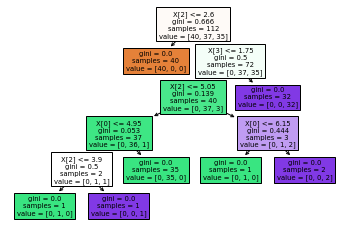

In [49]:
plot_tree(clf_tree, filled=True)

In [64]:
clf.tree_dict

{'feature': 2,
 'threshold': 2.5999999999999996,
 'true': {'feature': 3,
  'threshold': 1.75,
  'true': 2,
  'false': {'feature': 2,
   'threshold': 5.05,
   'true': {'feature': 0, 'threshold': 6.15, 'true': 2, 'false': 1},
   'false': {'feature': 0,
    'threshold': 4.95,
    'true': 1,
    'false': {'feature': 1, 'threshold': 2.45, 'true': 2, 'false': 1}}}},
 'false': 0}

In [52]:
clf.score(X_test, y_test)

0.9473684210526315

In [58]:
clf_tree.score(X_test, y_test)

0.9210526315789473